In [32]:
pip install pandas

In [5]:
pip install  gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00


In [6]:
# COMMAND LINE: !pip install pandas numpy matplotlib seaborn scikit-learn gradio

# 1. IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [7]:
# 2. LOAD THE DATA
# COMMAND LINE: Place your dataset in the same directory or provide path
df = pd.read_csv("https://github.com/keerthika-252006/Transforming-healthcare-with-AI-powered-disease-prediction-based-on-patient-data/raw/main/healthcare_dataset.csv")


In [8]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:

# 3. BASIC EXPLORATION
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (55500, 15)
Columns: Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [10]:

print("Data types:\n", df.dtypes)

Data types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [11]:

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [12]:


# 4. HANDLE MISSING VALUES
# Simple strategy: Fill numeric with median and categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())



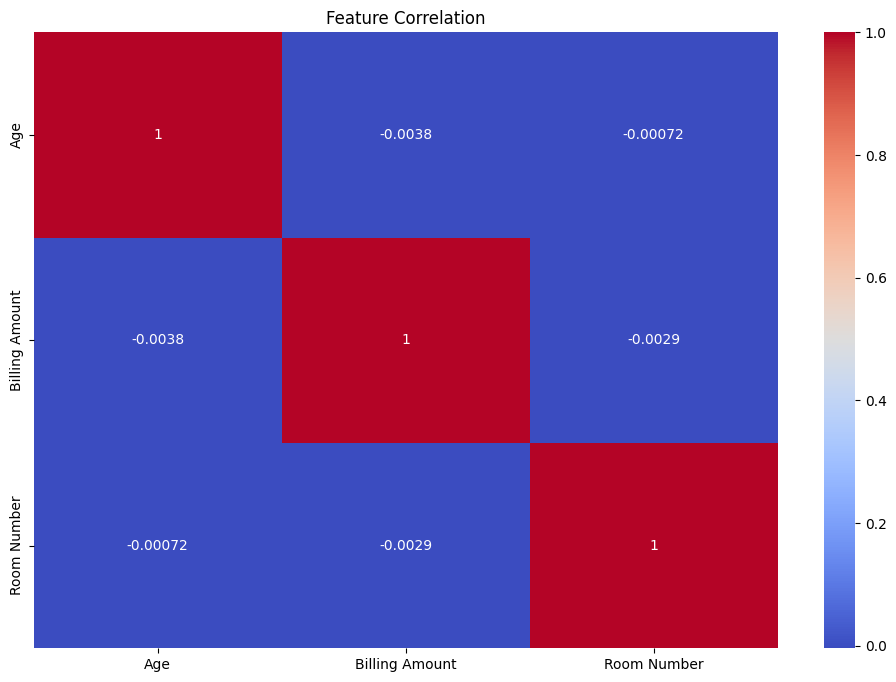

In [13]:

# 5. EDA: CORRELATION & CLASS BALANCE
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


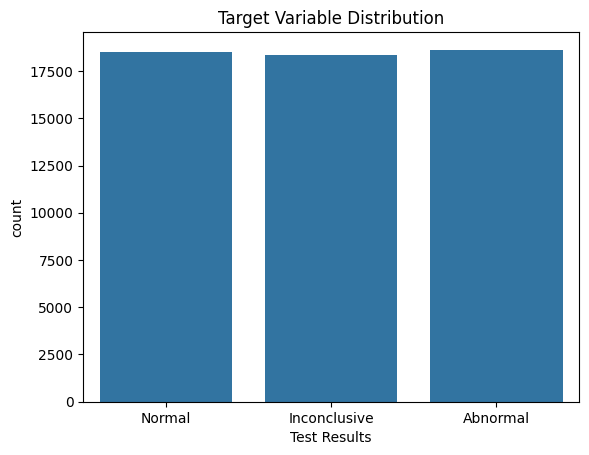

In [14]:

if 'Test Results' in df.columns:
    sns.countplot(x='Test Results', data=df)
    plt.title("Target Variable Distribution")
    plt.show()


In [33]:
cat_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Medication']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [15]:
# Ensure df is already loaded before encoding
# if 'df' in locals() or 'df' in globals():
#     cat_cols = df.select_dtypes(include='object').columns
#     le = LabelEncoder()
#     for col in cat_cols:
#         df[col] = le.fit_transform(df[col])
# else:
#     print("Error: The dataset 'df' is not defined. Please make sure you've loaded the dataset before running this segment.")





In [16]:
# 7. FEATURE/ TARGET SPLIT
correct_target_col = ['Test Results', 'Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date' ]  # Define the correct target column name # Changed from 'Outcome' to 'target'
X = df.drop(columns=correct_target_col, axis=1)
y = df['Test Results']



In [19]:
# # 8. SCALING FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [20]:

# 9. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [21]:
# 10. MODEL TRAINING
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [22]:
# 11. EVALUATION
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.330990990990991
Confusion Matrix:
 [[1228 1260 1266]
 [1240 1175 1202]
 [1231 1227 1271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33      3754
           1       0.32      0.32      0.32      3617
           2       0.34      0.34      0.34      3729

    accuracy                           0.33     11100
   macro avg       0.33      0.33      0.33     11100
weighted avg       0.33      0.33      0.33     11100



In [23]:
# 12. CROSS VALIDATION
scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validated Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())



Cross-validated Accuracy Scores: [0.33594595 0.33432432 0.34414414 0.34135135 0.36135135]
Mean CV Accuracy: 0.3434234234234234


In [27]:
# # 13. DEPLOYMENT WITH GRADIO
# # COMMAND LINE: gradio deployment as per guide

# def predict_disease(*inputs):
#     input_array = np.array(inputs).reshape(1, -1)
#     input_scaled = scaler.transform(input_array)
#     prediction = model.predict(input_scaled)
#     return f"Predicted Disease Status: {prediction[0]}"

#     # Define categorical options
# gender_options = ["Male", "Female"]
# blood_type_options = ["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"]
# medical_condition_options = ["Cancer", "Obesity", "Diabetes", "Heart Disease", "Hypertension", "Asthma"]
# medication_options = ["Paracetamol", "Ibuprofen", "Aspirin", "Penicillin", "Insulin", "Metformin"]




In [34]:
def predict_disease(Gender, Blood_Type, Medical_Condition, Medication, *inputs):
    # Convert categorical values to numeric
    gender_mapping = {"Male": 0, "Female": 1}
    blood_type_mapping = {"A+": 0, "A-": 1, "B+": 2, "B-": 3, "O+": 4, "O-": 5, "AB+": 6, "AB-": 7}
    medical_condition_mapping = {"Cancer": 0, "Obesity": 1, "Diabetes": 2, "Heart Disease": 3, "Hypertension": 4, "Asthma": 5}
    medication_mapping = {"Paracetamol": 0, "Ibuprofen": 1, "Aspirin": 2, "Penicillin": 3, "Insulin": 4, "Metformin": 5}

    # Apply mappings
    inputs = [gender_mapping[Gender], blood_type_mapping[Blood_Type], medical_condition_mapping[Medical_Condition], medication_mapping[Medication]] + list(inputs)

    # Convert to NumPy array and scale
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)

    return f"Predicted Disease Status: {prediction[0]}"

# Define categorical options
gender_options = ["Male", "Female"]
blood_type_options = ["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"]
medical_condition_options = ["Cancer", "Obesity", "Diabetes", "Heart Disease", "Hypertension", "Asthma"]
medication_options = ["Paracetamol", "Ibuprofen", "Aspirin", "Penicillin", "Insulin", "Metformin"]



In [35]:
# Dynamically define input components
input_components = [
    gr.Dropdown(choices=gender_options, label="Gender"),
    gr.Dropdown(choices=blood_type_options, label="Blood Type"),
    gr.Dropdown(choices=medical_condition_options, label="Medical Condition"),
    gr.Dropdown(choices=medication_options, label="Medication")
]

for col in X.columns:
    if col not in ["Gender", "Blood Type", "Medical Condition", "Medication"]:
        input_components.append(gr.Number(label=col))

# Create Gradio interface with updated inputs
interface = gr.Interface(
    fn=predict_disease,
    inputs=input_components,
    outputs="text",
    title="AI-powered Disease Predictor",
    description="Upload patient data to predict potential disease risk using AI"
)

# To run the app
# Uncomment the next line to run locally
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://adbaeb2fefc6e4ec0f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
